In [54]:
import torch
from torch import nn

In [55]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [56]:
EPOCH = 1               
BATCH_SIZE = 64
TIME_STEP = 28          
INPUT_SIZE = 28         
LR = 0.01               
DOWNLOAD_MNIST = True   

In [57]:
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         
    transform=transforms.ToTensor(),    
                                        
    download=DOWNLOAD_MNIST,            
)

torch.Size([60000, 28, 28])
torch.Size([60000])


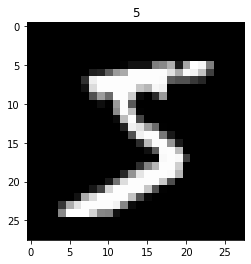

In [58]:
print(train_data.data.size())     
print(train_data.targets.size())   
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [59]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [60]:
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.data.type(torch.FloatTensor)[:2000]/255.   
test_y = test_data.targets.numpy()[:2000]    

In [61]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         
            input_size=INPUT_SIZE,
            hidden_size=64,         
            num_layers=1,           
            batch_first=True,       
        )

        self.out = nn.Linear(64, 10)
    def forward(self, x):
        
        r_out, (h_n, h_c) = self.rnn(x, None)   

        
        out = self.out(r_out[:, -1, :])
        return out

In [62]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [63]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   
loss_func = nn.CrossEntropyLoss()   

In [64]:
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):        
        b_x = b_x.view(-1, 28, 28)              

        output = rnn(b_x)                               
        loss = loss_func(output, b_y)                   
        optimizer.zero_grad()                           
        loss.backward()                                 
        optimizer.step()                                

        if step % 50 == 0:
            test_output = rnn(test_x)                   
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)


Epoch:  0 | train loss: 2.3079 | test accuracy: 0.10
Epoch:  0 | train loss: 1.0442 | test accuracy: 0.58
Epoch:  0 | train loss: 0.5509 | test accuracy: 0.75
Epoch:  0 | train loss: 0.4947 | test accuracy: 0.84
Epoch:  0 | train loss: 0.2929 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4010 | test accuracy: 0.90
Epoch:  0 | train loss: 0.4229 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3241 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2831 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1901 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1447 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1452 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1565 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3394 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1070 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1497 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1108 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1094 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2279 | test accuracy

In [65]:
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
